In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

# Загрузка и предобработка данных

In [ ]:
data = pd.read_csv('data_tury.csv')
data.head()

day                          name  price(min) tour_operator  \
0  15.05.2022  kylo_garden_hotel_by_julitat     52882.0     anex_tour   
1  15.05.2022             rose_resort_hotel     53465.0     anex_tour   
2  15.05.2022     senza_garden_holiday_club     56018.0     anex_tour   
3  15.05.2022  kylo_garden_hotel_by_julitat     63020.0     anex_tour   
4  15.05.2022             rose_resort_hotel     63750.0     anex_tour   

   amount_nights  hotel_stars nutrition_kind Resort(town)  hotel_rating  \
0              6            3             AI        Kemer           9.2   
1              6            4             AI        Kemer           9.2   
2              6            5            UAI       Alanya           8.0   
3              9            3             AI        Kemer           9.2   
4              9            4             AI        Kemer           9.2   

   line_of_location  ...  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0               1.0  ...          NaN          NaN          NaN          NaN   
1               1.0  ...          NaN          NaN          NaN          NaN   
2               1.0  ...          NaN          NaN          NaN          NaN   
3               1.0  ...          NaN          NaN          NaN          NaN   
4               1.0  ...          NaN          NaN          NaN          NaN   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 25  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 26 columns]

In [ ]:
data = data.drop(data.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               1406 non-null   object 
 1   name              1405 non-null   object 
 2   price(min)        1404 non-null   float64
 3   tour_operator     1406 non-null   object 
 4   amount_nights     1406 non-null   int64  
 5   hotel_stars       1406 non-null   int64  
 6   nutrition_kind    1405 non-null   object 
 7   Resort(town)      1405 non-null   object 
 8   hotel_rating      1405 non-null   float64
 9   line_of_location  1405 non-null   float64
 10  weather           1405 non-null   float64
 11  dollar_rate       1406 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 131.9+ KB


In [ ]:
data["name"].unique()

In [ ]:
data["name"] = data["name"].str.lower()
ord_enc = OrdinalEncoder()
data["name"] = ord_enc.fit_transform(data[["name"]])

In [ ]:
data["tour_operator"].unique()

array(['anex_tour', 'coral_travel', 'tez_tour'], dtype=object)

In [ ]:
ord_enc = OrdinalEncoder()
data["tour_operator"] = ord_enc.fit_transform(data[["tour_operator"]])

In [ ]:
data["nutrition_kind"].value_counts()

BB     396
AL     345
AI     199
Al     188
RO      97
UAI     89
UAl     45
UAL     40
OR       6
Name: nutrition_kind, dtype: int64

In [ ]:
data["nutrition_kind"] = data["nutrition_kind"].str.lower()

In [ ]:
data.loc[(data.nutrition_kind == 'ai'), 'nutrition_kind'] = 'al'
data.loc[(data.nutrition_kind == 'uai'), 'nutrition_kind'] = 'ual'
data.loc[(data.nutrition_kind == 'or'), 'nutrition_kind'] = 'ro'

In [ ]:
data["nutrition_kind"].value_counts()

al     732
bb     396
ual    174
ro     103
Name: nutrition_kind, dtype: int64

In [ ]:
mapping_nutrition_kind = {'ro': 1,
           'bb': 2,
           'al': 3,
           'ual': 4,
}

data["nutrition_kind"] = data["nutrition_kind"].map(mapping_nutrition_kind)

In [ ]:
data["Resort(town)"].unique()

array(['Kemer', 'Alanya', 'Marmaris', 'Kusadasi', 'Didim', 'Izmir',
       'Belek', 'Istanbul', 'Side', 'Antalya', 'Kushadasy', 'Bodrum',
       'side', 'kemer', 'istanbul', 'Fethiye', 'Stambul', nan],
      dtype=object)

In [ ]:
data["Resort(town)"] = data["Resort(town)"].str.lower()
data["Resort(town)"].unique()

array(['kemer', 'alanya', 'marmaris', 'kusadasi', 'didim', 'izmir',
       'belek', 'istanbul', 'side', 'antalya', 'kushadasy', 'bodrum',
       'fethiye', 'stambul', nan], dtype=object)

In [ ]:
ord_enc = OrdinalEncoder()
data["Resort(town)"] = ord_enc.fit_transform(data[["Resort(town)"]])

In [ ]:
day_of_the_month = []
month = []
year = []

for value in data['day']:
    day_of_the_month.append(value.split('.')[0])
    month.append(value.split('.')[1])
    year.append(value.split('.')[2])

day_of_the_month = [ i.lstrip('0') for i in day_of_the_month ]
month = [ i.lstrip('0') for i in month ] 

se_day_of_the_month = pd.Series(day_of_the_month)
data['day_of_the_month'] = se_day_of_the_month.values

se_month = pd.Series(month)
data['month'] = se_month.values

se_year = pd.Series(year)
data['year'] = se_year.values

data = data.drop(columns = ['day'],axis = 1)

In [ ]:
data.isnull().sum()

name                1
price(min)          2
tour_operator       0
amount_nights       0
hotel_stars         0
nutrition_kind      1
Resort(town)        1
hotel_rating        1
line_of_location    1
weather             1
dollar_rate         0
day_of_the_month    0
month               0
year                0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

name                0
price(min)          0
tour_operator       0
amount_nights       0
hotel_stars         0
nutrition_kind      0
Resort(town)        0
hotel_rating        0
line_of_location    0
weather             0
dollar_rate         0
day_of_the_month    0
month               0
year                0
dtype: int64

In [ ]:
data["year"].unique()

array(['2022'], dtype=object)

In [ ]:
data = data.drop(columns = ['year'],axis = 1)

In [ ]:
data.head()

name  price(min)  tour_operator  amount_nights  hotel_stars  \
0   78.0     52882.0            0.0              6            3   
1  110.0     53465.0            0.0              6            4   
2  114.0     56018.0            0.0              6            5   
3   78.0     63020.0            0.0              9            3   
4  110.0     63750.0            0.0              9            4   

   nutrition_kind  Resort(town)  hotel_rating  line_of_location  weather   \
0             3.0           8.0           9.2               1.0      26.0   
1             3.0           8.0           9.2               1.0      26.0   
2             4.0           0.0           8.0               1.0      26.0   
3             3.0           8.0           9.2               1.0      26.0   
4             3.0           8.0           9.2               1.0      26.0   

   dollar_rate day_of_the_month month  
0         66.5               15     5  
1         66.5               15     5  
2         66.5               15     5  
3         66.5               15     5  
4         66.5               15     5

# Визуализация

Визуализация зависимостей различных признаков между собой

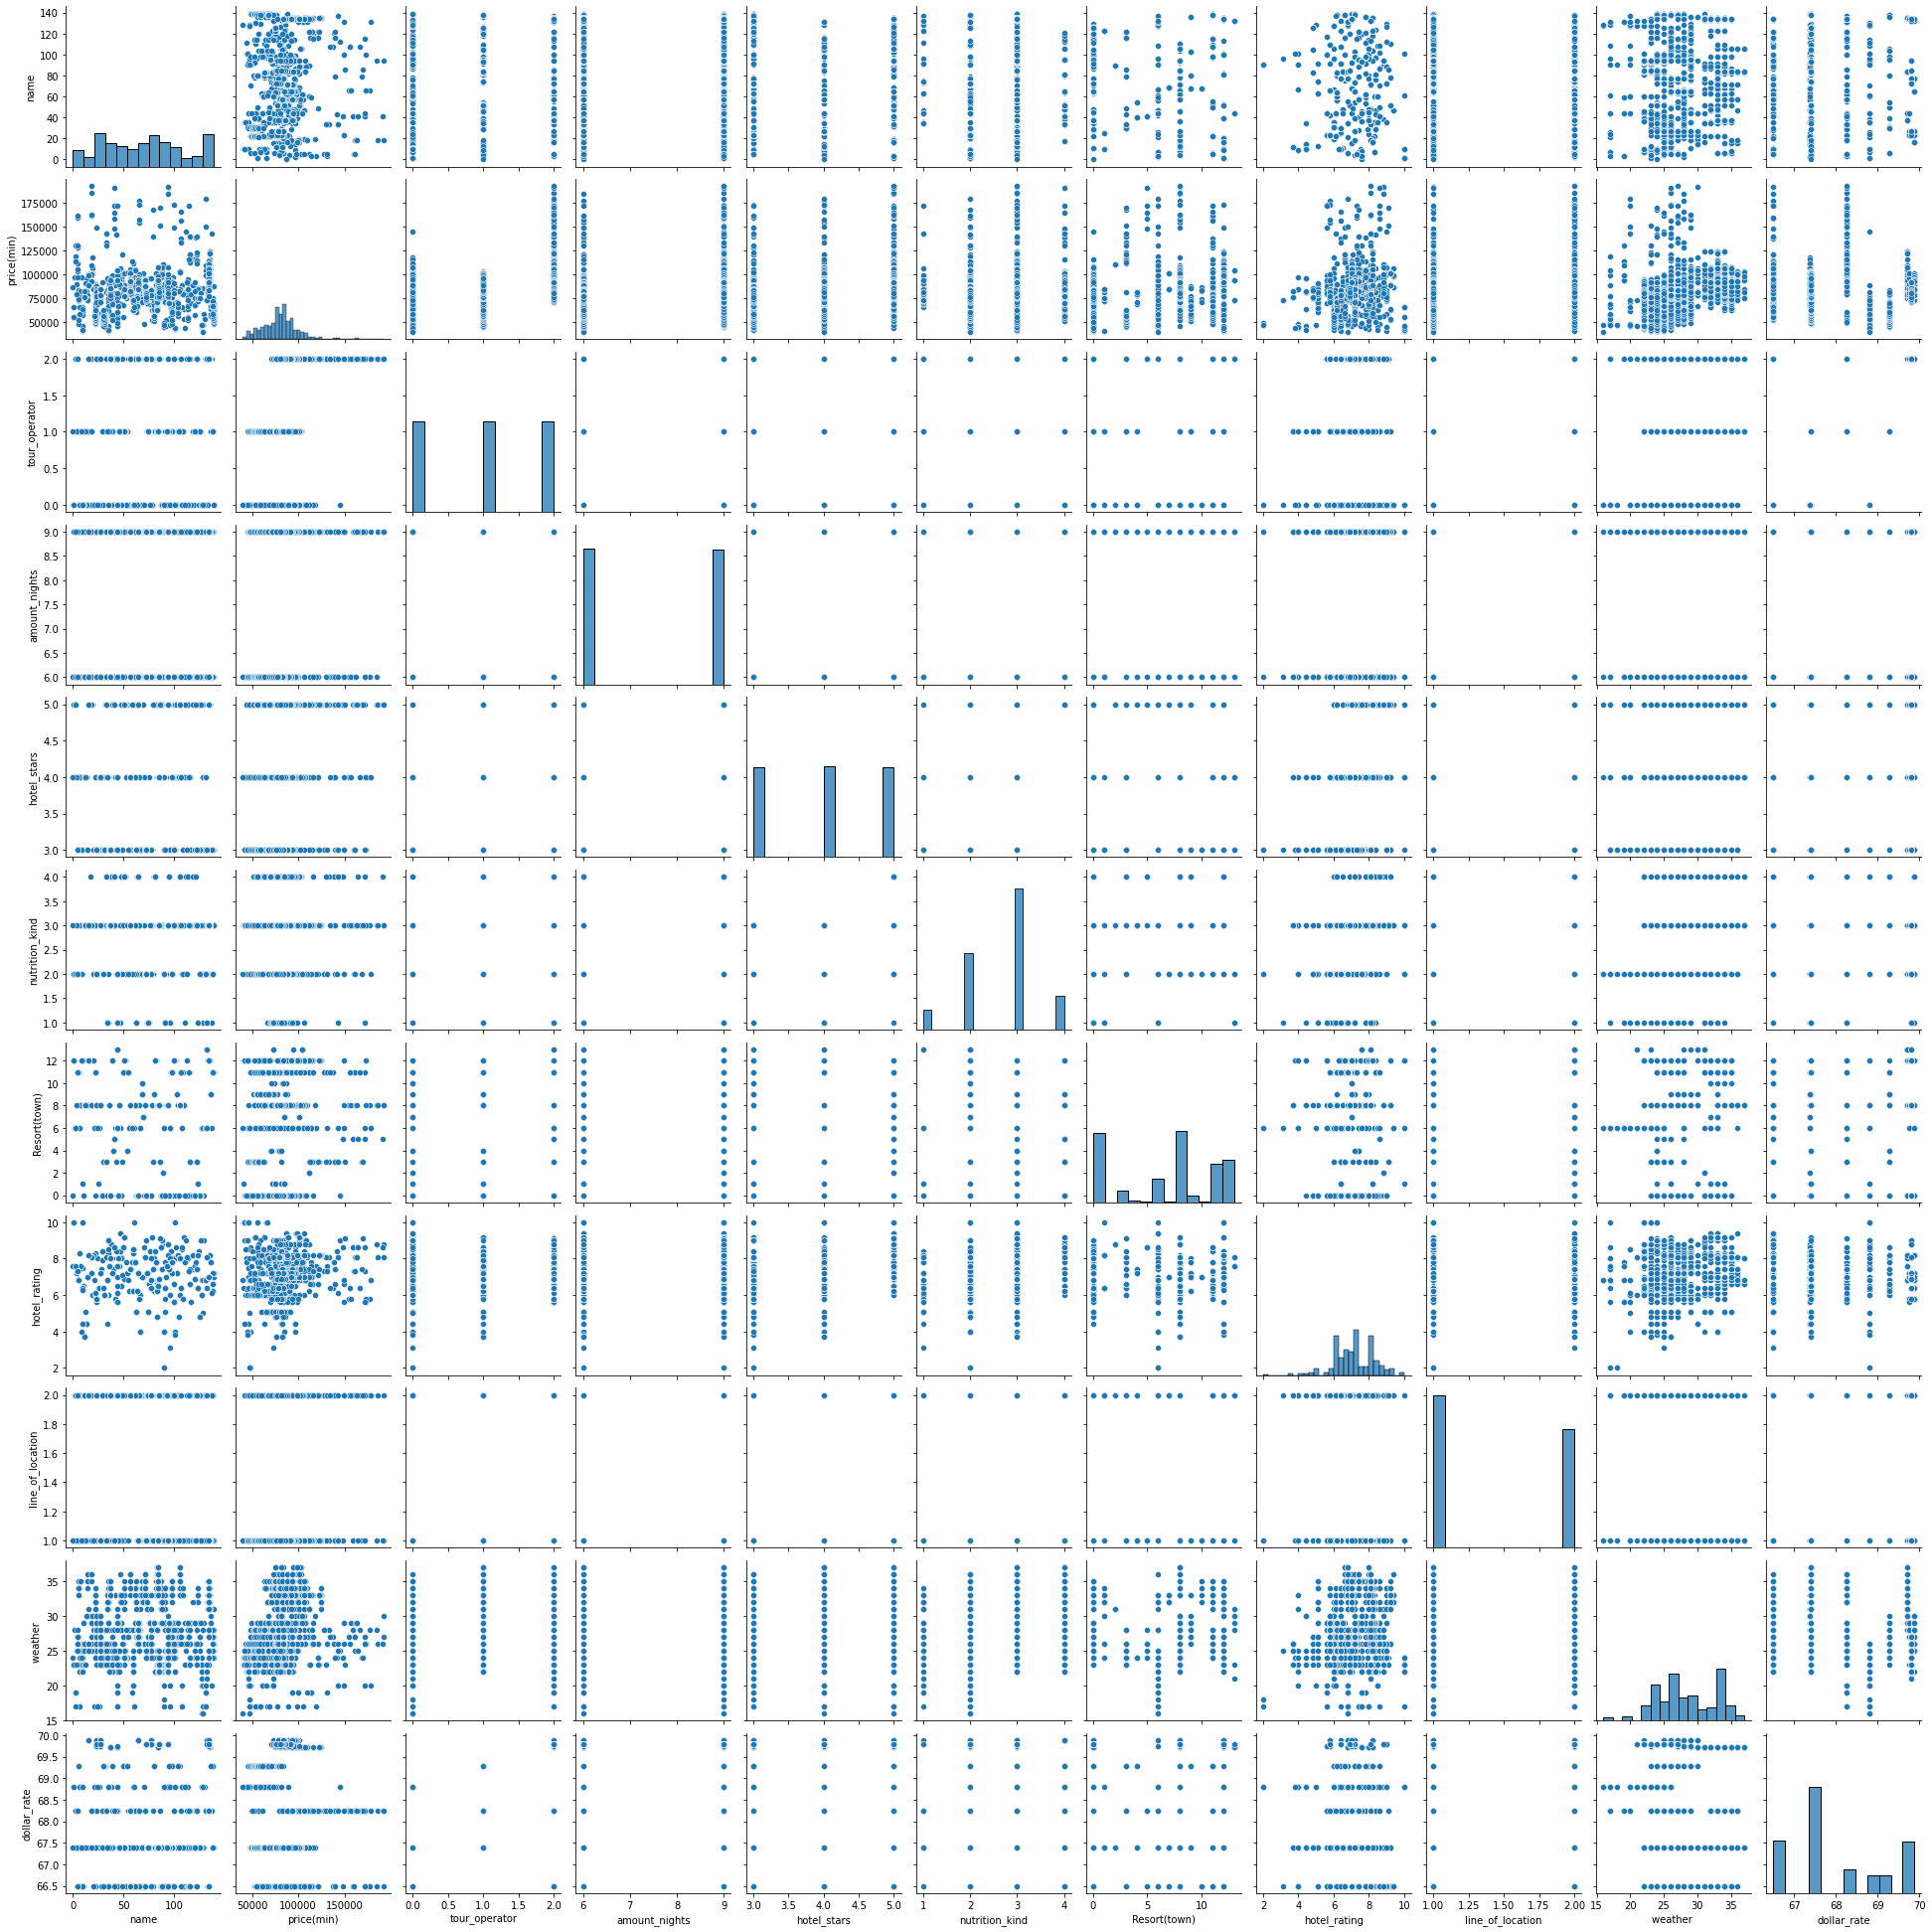

In [ ]:
cols = list(data.columns)
sns_plot = sns.pairplot(data[cols])

Тепловая карта

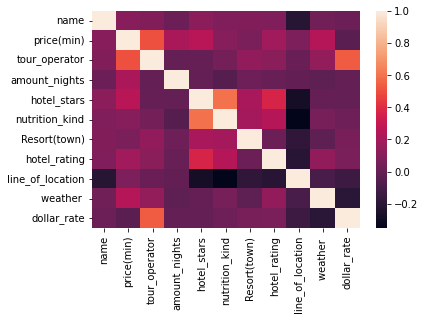

In [ ]:
sns.heatmap(data.corr());

Зависимость стоимости от тур оператора

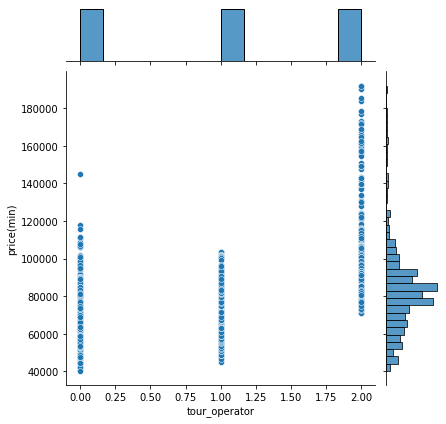

In [ ]:
sns.jointplot(y=data['price(min)'], x=data['tour_operator']);

Зависимость стоимости от месяца

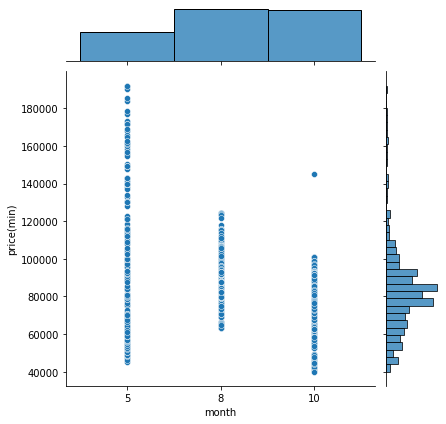

In [ ]:
sns.jointplot(y=data['price(min)'], x=data['month']);

# Разбиение выборки

In [ ]:
X = data.drop('price(min)', axis=1)
y = data['price(min)']

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

total_rows, total_columns = X.shape

bias_col = np.ones(shape=(total_rows, 1))
X_scaled = np.concatenate((bias_col, X_scaled), axis=1)

X_reg = X_scaled
y_reg = y

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.20)

# Градиентный бустинг

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters = {'n_estimators':[10,15,20,25,30,35,40,45,50,55,60,65,70,100,125,150,175,200],
              'learning_rate':[0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
             }
GBR = GradientBoostingRegressor()

reg = GridSearchCV(GBR, parameters)
reg.fit(X_reg_train, y_reg_train)
reg.best_params_

{'learning_rate': 0.1, 'n_estimators': 175}

In [ ]:
reg = GradientBoostingRegressor(n_estimators= 150, learning_rate= 0.1)
reg.fit(X_reg_train, y_reg_train)
y_pred = reg.predict(X_reg_test)

In [ ]:
print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_reg_test, y_pred))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_reg_test, y_pred, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_reg_test, y_pred))
print('R^2:', metrics.r2_score(y_reg_test, y_pred))

Средняя абсолютная ошибка (MAE): 4771.631652189875
Среднеквадратическая ошибка (RMSE): 8885.089791507258
Средняя квадратичная ошибка (MSE): 78944820.60314648
R^2: 0.8196247065862026


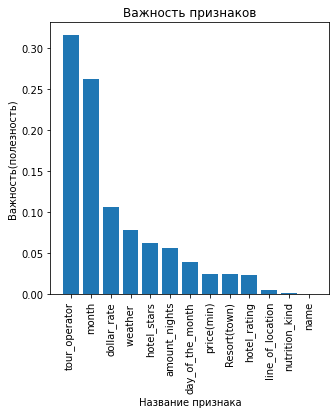

In [ ]:
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5, 5))
plt.title('Важность признаков')
plt.ylabel('Важность(полезность)')
plt.xlabel('Название признака')

plt.bar(data.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Predicted price by data model')

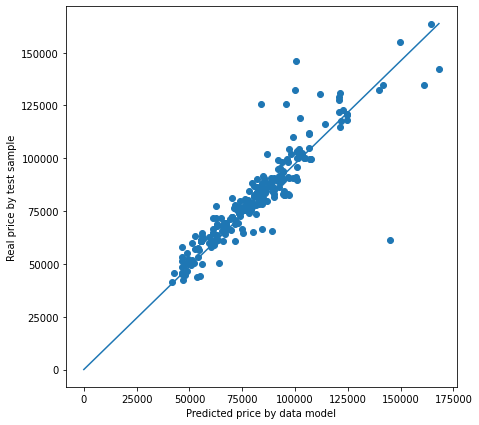

In [ ]:
test_prediction_GBR = reg.predict(X_reg_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_reg_test, test_prediction_GBR)
plt.plot([0, max(y_reg_test)], [0, max(test_prediction_GBR)])
plt.ylabel('Real price by test sample')
plt.xlabel('Predicted price by data model')

# Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[10,30,50,70,100,150,200], 'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
reg = RandomForestRegressor()
gcv = GridSearchCV(reg, parameters)
gcv.fit(X_reg_train, y_reg_train)
gcv.best_params_

{'max_depth': 10,
 'max_features': 13,
 'min_samples_leaf': 1,
 'n_estimators': 30}

In [ ]:
reg = RandomForestRegressor(n_estimators=10, max_depth=10, max_features=13, min_samples_leaf=1)
reg.fit(X_reg_train, y_reg_train)
y_pred = reg.predict(X_reg_test)

In [ ]:
print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_reg_test, y_pred))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_reg_test, y_pred, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_reg_test, y_pred))
print('R^2:', metrics.r2_score(y_reg_test, y_pred))

Средняя абсолютная ошибка (MAE): 4143.383836003859
Среднеквадратическая ошибка (RMSE): 8388.50097174057
Средняя квадратичная ошибка (MSE): 70366948.55289248
R^2: 0.8392236641379398


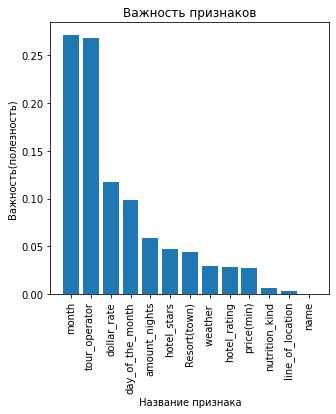

In [ ]:
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5, 5))
plt.title('Важность признаков')
plt.ylabel('Важность(полезность)')
plt.xlabel('Название признака')

plt.bar(data.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Predicted price by data model')

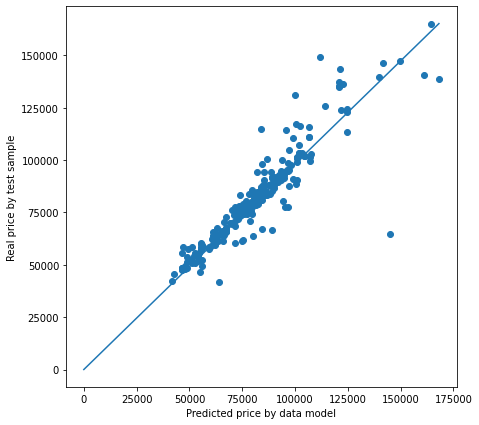

In [ ]:
test_prediction_RFR = reg.predict(X_reg_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_reg_test, test_prediction_RFR)
plt.plot([0, max(y_reg_test)], [0, max(test_prediction_RFR)])
plt.ylabel('Real price by test sample')
plt.xlabel('Predicted price by data model')

# Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'fit_intercept': [True, False],
             'n_jobs': [5, 10 ,25, 30, 40, 55, 70, 100]}

lin_regressor = LinearRegression()
random_search = RandomizedSearchCV(lin_regressor, param_dist, cv = 3) 
random_search.fit(X_reg_train, y_reg_train)
print("Лучшие параметры", random_search.best_params_)

Лучшие параметры {'n_jobs': 100, 'fit_intercept': False}


In [ ]:
lin_regressor = LinearRegression(n_jobs=70, fit_intercept=False)
lin_regressor.fit(X_reg_train, y_reg_train)
y_pred_lin = lin_regressor.predict(X_reg_test)

In [ ]:
print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_reg_test, y_pred_lin))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_reg_test, y_pred_lin, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_reg_test, y_pred_lin))
print('R^2:', 	metrics.r2_score(y_reg_test, y_pred_lin))

Средняя абсолютная ошибка (MAE): 9760.249376687081
Среднеквадратическая ошибка (RMSE): 13881.644443217721
Средняя квадратичная ошибка (MSE): 192700052.44791746
R^2: 0.5597136299051655


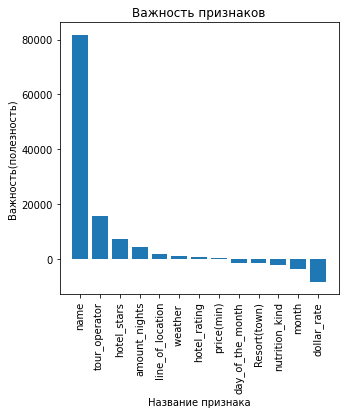

In [ ]:
importances = lin_regressor.coef_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5, 5))
plt.title('Важность признаков')
plt.ylabel('Важность(полезность)')
plt.xlabel('Название признака')

plt.bar(data.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Predicted price by data model')

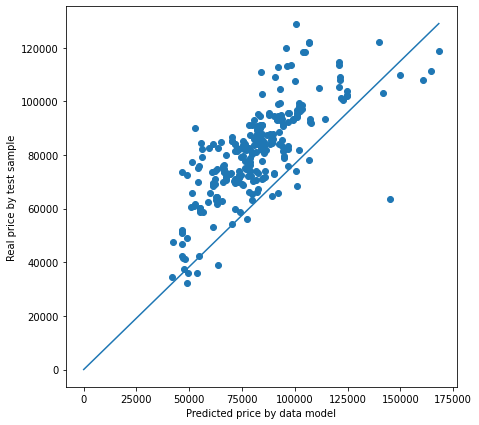

In [ ]:
test_prediction_lin = lin_regressor.predict(X_reg_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_reg_test, test_prediction_lin)
plt.plot([0, max(y_reg_test)], [0, max(test_prediction_lin)])
plt.ylabel('Real price by test sample')
plt.xlabel('Predicted price by data model')